In [28]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


## Data Import

In [29]:
df=pd.read_excel(r"C:\Users\Chetan Habib\Desktop\Machine Learning\Air.xls")
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


## Data Type 

In [30]:
df= df.head().drop(['Season','Site','Date'],axis=1) # axix=1  means column index dropping unwanted data
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    5 non-null      float64
 1   Pb      5 non-null      float64
 2   Cd      5 non-null      float64
 3   Cu      5 non-null      float64
 4   Cr      5 non-null      float64
 5   Zn      5 non-null      int64  
 6   NOx     5 non-null      float64
 7   SO2     5 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 448.0 bytes


## Univariate Analysis

In [32]:
df.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000
mean,106.366000,1.766000,0.008000,0.312000,0.786000,0.0,72.996000,34.958000
std,25.706009,1.261836,0.008367,0.171231,0.465113,0.0,17.045887,11.529006
min,75.050000,0.600000,0.000000,0.100000,0.390000,0.0,48.710000,19.230000
25%,88.810000,0.760000,0.000000,0.190000,0.480000,0.0,61.800000,27.420000
50%,107.010000,1.310000,0.010000,0.330000,0.610000,0.0,81.490000,39.480000
75%,120.710000,2.670000,0.010000,0.410000,0.910000,0.0,84.170000,40.370000
max,140.250000,3.490000,0.020000,0.530000,1.540000,0.0,88.810000,48.290000


## EDA

# for both(org)

for i in df:
    
    if df[i].dtypes in ("float64","int64"):
        
        q1 = df[i].quantile(0.25)
        
        q3 = df[i].quantile(0.75)
        
        iqr = q3-q1
        
        ul = q3 + 1.5*iqr
        
        ll = q1 - 1.5*iqr
        
        df[i].clip(upper=ul,lower=ll,inplace=True)

# Upper limit

q1 = df1['PM10'].quantile(0.25)

q3 = df1['PM10'].quantile(0.75)

iqr = q3-q1 #Interquartile range


upper_limit = q3+1.5*iqr 

upper_limit

df1['PM10']=np.where(df1['PM10'] > upper_limit,upper_limit,df1['PM10'])

# Lower Limit

q1 = df1['PM10'].quantile(0.25)


q3 = df1['PM10'].quantile(0.75)


iqr = q3-q1 #Interquartile range


lower_limit = q1-1.5*iqr


lower_limit

df['Salary']=np.where(df['Salary'] < Lower_limit,Lower_limit,df['Salary']) 

def lower_outliers(table):

    for i in table:
    
        q1 = table[i].quantile(0.25)
        
        q3 = table[i].quantile(0.75)
        
        iqr = q3-q1 #Interquartile range
        
        Lower_limit  = q1-1.5*iqr
        
        table[i]=np.where(table[i] < Lower_limit,Lower_limit,table[i]

def upper_outliers(table):

    for i in table:
    
        q1 = table[i].quantile(0.25)
        
        q3 = table[i].quantile(0.75)
        
        iqr = q3-q1 #Interquartile range
        
        upper_limit = q3+1.5*iqr
        
        table[i]=np.where(table[i] > upper_limit,upper_limit,table[i])

# For both

for i in new:


    if new[i].dtypes in ("float64","int64"):
    
    
        q1 = new[i].quantile(0.25)
        
        
        q3 = new[i].quantile(0.75)
        
        iqr = q3-q1
        
        ul = q3 + 1.5*iqr
        
        ll = q1 - 1.5*iqr
        
        new[i].clip(upper=ul,lower=ll,inplace=True)

#category =mode ,

number+outliers=median 

number +no outliers =mean,


# solution

def abc(data):
    
    a = data[data.select_dtypes(include=['object']).columns.tolist()]
    
    for column_name in a:
        
        data[column_name].fillna(data[column_name].mode()[0], inplace=True)
        
    b=select_dtypes(include=[np.number]).columns.tolist()
    
    for column_name in b:
        
        q1 =data[column_name].quantile(0.25)
        
        q3 = data[column_name].quantile(0.75)
        
        iqr = q3-q1 
        
        upper_limit = q3+1.5*iqr
        
        Lower_limit  = q1-1.5*iqr
        
        c=data.loc[:,column_name]
        
        for i in c:
            
            if i>upper_limit or i<Lower_limit:
                
                data[column_name].fillna(data[column_name].quantile(0.5),inplace=True)
                
            else:
                
                data[column_name].fillna(data[column_name].mean(),inplace=True)

<AxesSubplot:>

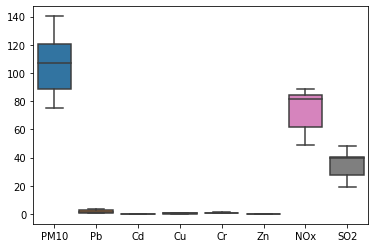

In [33]:
sns.boxplot(data=df)

In [34]:
q1 = new['PM10'].quantile(0.25)
q3 = new['PM10'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

169.0425

In [35]:
df['PM10']=np.where(df['PM10'] > upper_limit,upper_limit,df['PM10']) # upper limit

<AxesSubplot:>

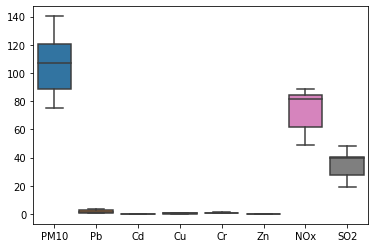

In [36]:
sns.boxplot(data=df)

In [37]:
q1 = df['NOx'].quantile(0.25)
q3 = df['NOx'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

117.72500000000001

In [38]:
df['NOx']=np.where(df['NOx'] > upper_limit,upper_limit,df['NOx'])

<AxesSubplot:>

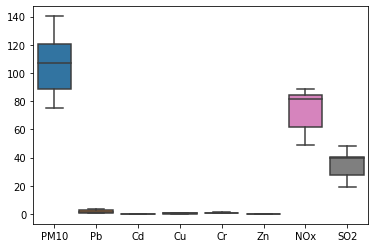

In [39]:
sns.boxplot(data=df)

In [40]:
q1 = df['SO2'].quantile(0.25)
q3 = df['SO2'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

59.79499999999999

In [41]:
df['SO2']=np.where(df['SO2'] > upper_limit,upper_limit,df['SO2'])

<AxesSubplot:>

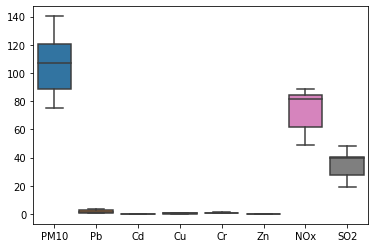

In [42]:
sns.boxplot(data=df)

In [43]:
q1 = new['Pb'].quantile(0.25)
q3 = new['Pb'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.0825

In [44]:
df['Pb']=np.where(df['Pb'] > upper_limit,upper_limit,df['Pb'])

<AxesSubplot:>

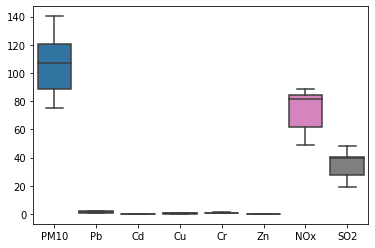

In [45]:
sns.boxplot(data=df)

In [46]:
q1 = df['Cd'].quantile(0.25)
q3 = df['Cd'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.025

In [50]:
df['Cd']=np.where(df['Cd'] > upper_limit,upper_limit,df['Cd'])

<AxesSubplot:>

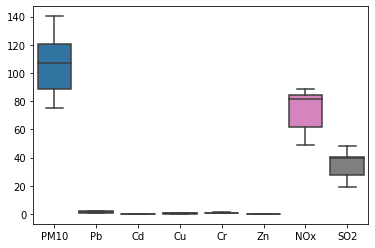

In [51]:
sns.boxplot(data=df)

In [52]:
q1 = df['Cu'].quantile(0.25)
q3 = df['Cu'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.74

In [53]:
df['Cu']=np.where(df['Cu'] > upper_limit,upper_limit,df['Cu'])

<AxesSubplot:>

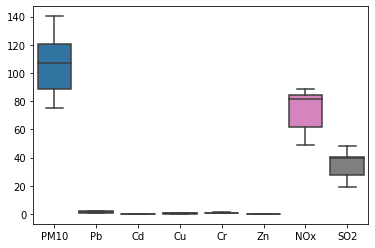

In [54]:
sns.boxplot(data=df)

In [55]:
q1 = df['Cr'].quantile(0.25)
q3 = df['Cr'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.5550000000000002

In [56]:
df['Cr']=np.where(df['Cr'] > upper_limit,upper_limit,df['Cr'])

<AxesSubplot:>

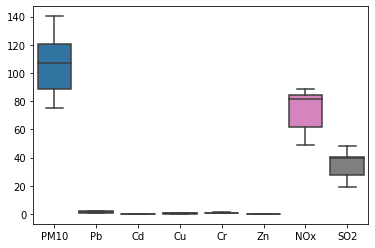

In [57]:
sns.boxplot(data=df)

In [58]:
new.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


In [59]:
new.isna().sum()

PM10      0
Pb        0
Cd        0
Cu        0
Cr        0
Zn        0
NOx       0
SO2       0
Site      0
Date      0
Season    0
dtype: int64

## Splitting the data into train and test set

In [60]:
new.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer


In [61]:
# Putting feature variable to X
X = df.drop('PM10', axis= 1)

# Putting response variable to y
y = df[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [62]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
3,88.81,0.7600,0.00,0.33,0.39,0,61.80,27.42
2,107.01,1.3100,0.01,0.19,0.48,0,81.49,48.29
0,120.71,2.0825,0.01,0.53,0.61,0,84.17,40.37


## Correlation Matrix

In [63]:
df.corr()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
PM10,1.000000,0.984183,0.903755,0.517450,0.982779,NaN,0.945257,0.676593
Pb,0.984183,1.000000,0.813629,0.660860,0.999970,NaN,0.872495,0.535442
Cd,0.903755,0.813629,1.000000,0.101361,0.809093,NaN,0.993965,0.926672
Cu,0.517450,0.660860,0.101361,1.000000,0.666664,NaN,0.209882,-0.280007
Cr,0.982779,0.999970,0.809093,0.666664,1.000000,NaN,0.868678,0.528873
Zn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOx,0.945257,0.872495,0.993965,0.209882,0.868678,NaN,1.000000,0.879848
SO2,0.676593,0.535442,0.926672,-0.280007,0.528873,NaN,0.879848,1.000000


<AxesSubplot:>

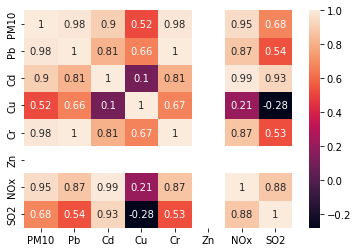

In [64]:
sns.heatmap(df.corr(),annot = True)

In [65]:
import statsmodels.formula.api as smf
model = smf.ols('PM10 ~ Pb + Cu + Cr + SO2',data=df).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                nan
Time:                        12:46:59   Log-Likelihood:                 81.941
No. Observations:                   3   AIC:                            -157.9
Df Residuals:                       0   BIC:                            -160.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.8828        inf          0        nan         nan         nan
Pb            10.8016        inf          0        nan         nan         nan
Cu            26.7303        inf          0        nan         nan         nan
Cr            14.2543        inf          0        nan         nan         nan
SO2            0.7052        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.410
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.525
Skew:                          -0.698   Prob(JB):                        0.769
Kurtosis:                       1.500   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [66]:
import statsmodels.formula.api as smf
model2 = smf.ols('PM10 ~ Pb + Cr',data=df).fit()
model2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                nan
Time:                        12:47:41   Log-Likelihood:                 79.082
No. Observations:                   3   AIC:                            -152.2
Df Residuals:                       0   BIC:                            -154.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    941.2024        inf          0        nan         nan         nan
Pb           573.6709        inf          0        nan         nan         nan
Cr         -3303.5443        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.118
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.521
Skew:                          -0.692   Prob(JB):                        0.771
Kurtosis:                       1.500   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,fitted_value,residual
3,88.81,0.7600,0.00,0.33,0.39,0,61.80,27.42,88.81,-6.252776e-13
2,107.01,1.3100,0.01,0.19,0.48,0,81.49,48.29,107.01,-6.679102e-13
0,120.71,2.0825,0.01,0.53,0.61,0,84.17,40.37,120.71,-1.179501e-12


<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

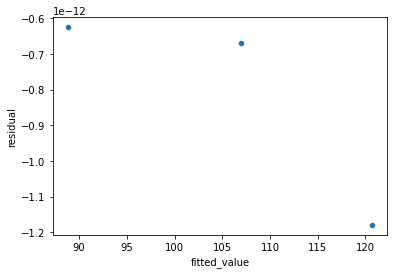

In [68]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

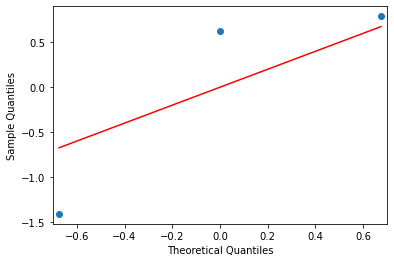

In [69]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<AxesSubplot:ylabel='Frequency'>

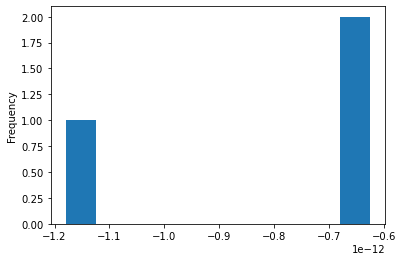

In [70]:
df['residual'].plot.hist()

In [71]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,PM10
1,2.0825,0.02,0.10,0.91,0,88.81,39.48,140.25
4,0.6000,0.00,0.41,1.54,0,48.71,19.23,75.05


In [72]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,PM10,Prediction
1,2.0825,0.02,0.10,0.91,0,88.81,39.48,140.25,-870.353291
4,0.6000,0.00,0.41,1.54,0,48.71,19.23,75.05,-3802.053291


In [73]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.PM10, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test -7551.62
